## AI Cw Initial

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv(r'./btc-usd-max.csv', index_col='snapped_at')

In [21]:
df.head()

,price,market_cap,total_volume
snapped_at,,,
2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [22]:
df.tail()

,price,market_cap,total_volume
snapped_at,,,
2024-03-10 00:00:00 UTC,68508.003963,1.346027e+12,2.135971e+10
2024-03-11 00:00:00 UTC,69075.666882,1.357390e+12,3.666054e+10
2024-03-12 00:00:00 UTC,72130.553008,1.417773e+12,6.665307e+10
2024-03-13 00:00:00 UTC,71467.173503,1.403693e+12,6.459934e+10
2024-03-14 00:00:00 UTC,73097.767027,1.436631e+12,5.190660e+10


In [23]:
df.shape

(3972, 3)

In [24]:
# check duplicate rows

df_duplicate = df[df.duplicated()]

print("duplicated Rows ",df_duplicate.shape)

duplicated Rows  (0, 3)


In [25]:
#null vals

print(df.isnull().sum())

price           0
market_cap      1
total_volume    0
dtype: int64


In [12]:
# remove null market_cap

In [40]:
# display row with null values before removing them
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [price, market_cap, total_volume]
Index: []


In [38]:
# drop null values in specified column
df.dropna(subset=['market_cap'],inplace=True)

In [42]:
# check now if you got null values
print(df.isnull().sum())

price           0
market_cap      0
total_volume    0
value           3
dtype: int64


In [43]:
# drop if necessary
df.drop(columns=['value'])

,price,market_cap,total_volume
snapped_at,,,
2013-04-28 00:00:00 UTC,135.300000,1.500518e+09,0.000000e+00
2013-04-29 00:00:00 UTC,141.960000,1.575032e+09,0.000000e+00
2013-04-30 00:00:00 UTC,135.300000,1.501657e+09,0.000000e+00
2013-05-01 00:00:00 UTC,117.000000,1.298952e+09,0.000000e+00
2013-05-02 00:00:00 UTC,103.430000,1.148668e+09,0.000000e+00
...,...,...,...
2024-03-10 00:00:00 UTC,68508.003963,1.346027e+12,2.135971e+10
2024-03-11 00:00:00 UTC,69075.666882,1.357390e+12,3.666054e+10
2024-03-12 00:00:00 UTC,72130.553008,1.417773e+12,6.665307e+10


In [28]:
df.describe()

,price,market_cap,total_volume
count,3971.000000,3.971000e+03,3.971000e+03
mean,13443.291219,2.519189e+11,1.448109e+10
std,16533.602750,3.161688e+11,1.828787e+10
min,67.809000,7.713681e+08,0.000000e+00
25%,585.969150,7.846652e+09,2.035655e+08
50%,6842.038598,1.183888e+11,4.686095e+09
75%,21726.227787,4.175208e+11,2.423740e+10
max,73097.767027,1.436631e+12,1.788941e+11


In [29]:
df.dtypes

price           float64
market_cap      float64
total_volume    float64
dtype: object

In [33]:
total_n_prices = df['price'].value_counts()

print(total_n_prices)

135.300000      2
638.070000      2
131.650000      2
11719.263524    1
9535.938796     1
               ..
826.620768      1
859.366300      1
917.098800      1
891.681300      1
73097.767027    1
Name: price, Length: 3968, dtype: int64


In [34]:
# database info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3971 entries, 2013-04-28 00:00:00 UTC to 2024-03-14 00:00:00 UTC
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         3971 non-null   float64
 1   market_cap    3971 non-null   float64
 2   total_volume  3971 non-null   float64
dtypes: float64(3)
memory usage: 253.1+ KB


In [37]:
# specific amount of head
df.head(10)

,price,market_cap,total_volume
snapped_at,,,
2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0
2013-05-03 00:00:00 UTC,91.01,1.011066e+09,0.0
2013-05-04 00:00:00 UTC,111.25,1.236352e+09,0.0
2013-05-05 00:00:00 UTC,116.79,1.298378e+09,0.0
2013-05-06 00:00:00 UTC,118.33,1.315992e+09,0.0


In [36]:
#specific amount of tail
df.tail(8)

,price,market_cap,total_volume
snapped_at,,,
2024-03-07 00:00:00 UTC,66145.919279,1.297846e+12,7.315191e+10
2024-03-08 00:00:00 UTC,66944.876391,1.317508e+12,4.885389e+10
2024-03-09 00:00:00 UTC,68315.251921,1.340971e+12,6.334659e+10
2024-03-10 00:00:00 UTC,68508.003963,1.346027e+12,2.135971e+10
2024-03-11 00:00:00 UTC,69075.666882,1.357390e+12,3.666054e+10
2024-03-12 00:00:00 UTC,72130.553008,1.417773e+12,6.665307e+10
2024-03-13 00:00:00 UTC,71467.173503,1.403693e+12,6.459934e+10
2024-03-14 00:00:00 UTC,73097.767027,1.436631e+12,5.190660e+10


## Feature Engineering

In [69]:
import pandas as pd

t_value = 5000
# Deriving a new feature based on price
values = {}
for x in range(0, 16):  # Adjust range to include all values
    values["{0}".format(x*t_value)] = x * t_value

# Calculate labels
labels = [f"{x*t_value}" for x in range(15)]

print(labels)
print(values)

# Assuming df['price'] is your DataFrame column containing prices
df['value'] = pd.cut(df['price'], bins=list(values.values()), labels=labels, include_lowest=True, right=False)

# Count the values
value_counts = df['value'].value_counts()

print(value_counts)


['0', '5000', '10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000', '50000', '55000', '60000', '65000', '70000']
{'0': 0, '5000': 5000, '10000': 10000, '15000': 15000, '20000': 20000, '25000': 25000, '30000': 30000, '35000': 35000, '40000': 40000, '45000': 45000, '50000': 50000, '55000': 55000, '60000': 60000, '65000': 65000, '70000': 70000, '75000': 75000}
0        1762
5000      717
10000     238
25000     217
15000     191
20000     165
40000     151
35000     140
30000     110
45000     105
55000      66
50000      54
60000      40
65000      12
70000       3
Name: value, dtype: int64


value14
{'value0': 0, 'value1': 5000, 'value2': 10000, 'value3': 15000, 'value4': 20000, 'value5': 25000, 'value6': 30000, 'value7': 35000, 'value8': 40000, 'value9': 45000, 'value10': 50000, 'value11': 55000, 'value12': 60000, 'value13': 65000, 'value14': 70000}


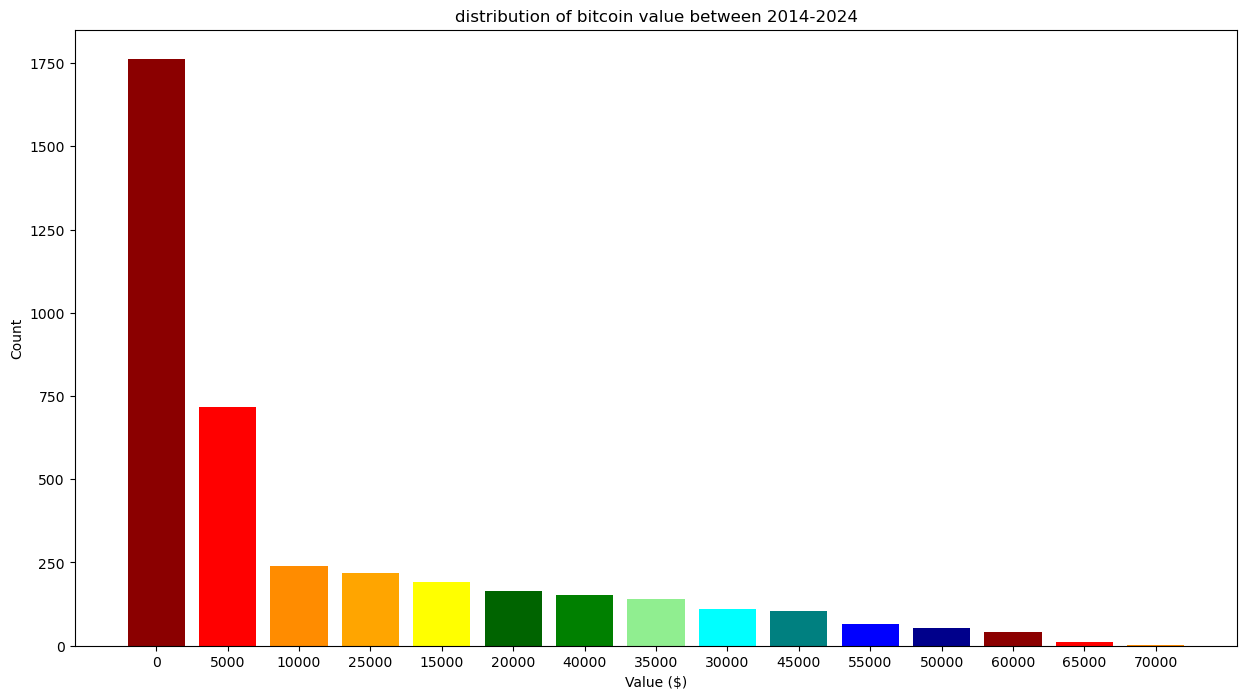

In [70]:
# Increase figure size
plt.figure(figsize=(15, 8))

plt.bar(value_counts.index , value_counts.values , color =['darkred','red','darkorange','orange','yellow','darkgreen','green','lightgreen','cyan','teal','blue','darkblue'])
plt.xlabel('Value ($)')
plt.ylabel('Count')
plt.title('distribution of bitcoin value between 2014-2024')
plt.show()

In [71]:
df.head()

,price,market_cap,total_volume,value
snapped_at,,,,
2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0,0
2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0,0
2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0,0
2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0,0
2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0,0


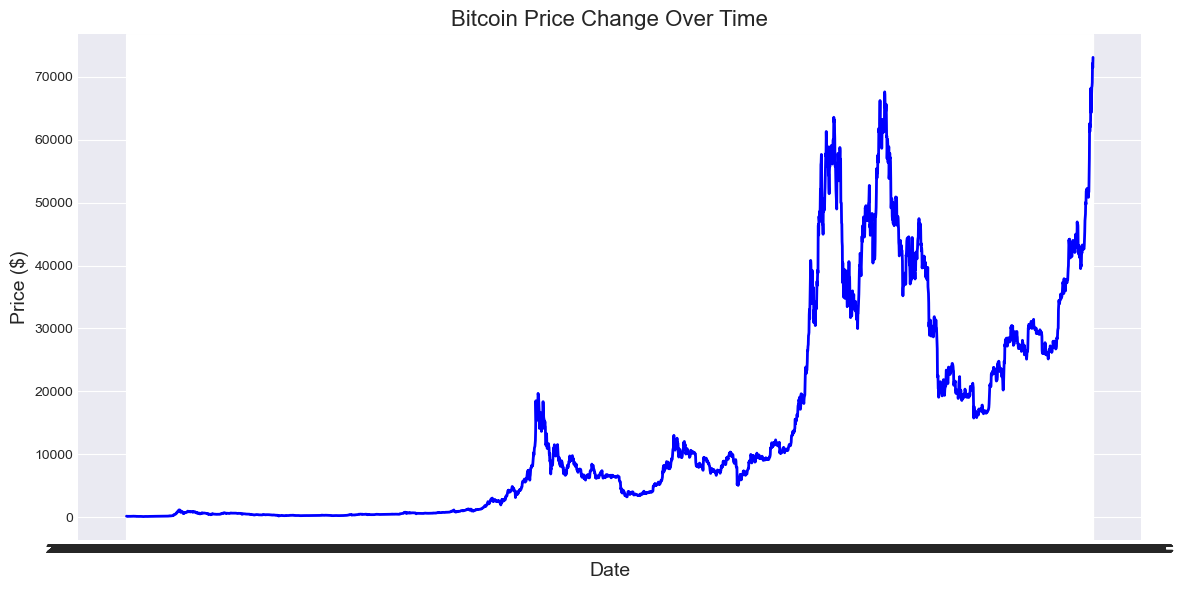

In [79]:
import seaborn as sns
df2 = pd.read_csv(r'./btc-usd-max.csv')
# Set seaborn style
sns.set_style("darkgrid")

# Adjust figure size
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(df2['snapped_at'], df2['price'], color='blue', linewidth=2)

# Add labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Bitcoin Price Change Over Time', fontsize=16)

# Adjust tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

